In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# plotting!

In [2]:
df = pd.read_csv('data.csv',
                 parse_dates=[0], 
                 names=['dt','wd','n'],
                 index_col='dt'
                )
df['date'] = [x.date() for x in df.index]
df['time'] = [datetime.datetime.combine(datetime.date.today(), x.time()) for x in df.index]
df_hourly = df.resample('H').mean().dropna()
week = df.groupby('wd')

df_hourly['wd'] = df_hourly['wd'].astype('int')
df_hourly['date'] = [x.date() for x in df_hourly.index]
df_hourly['time'] = [x.hour for x in df_hourly.index]
week_hourly = df_hourly.groupby('wd')

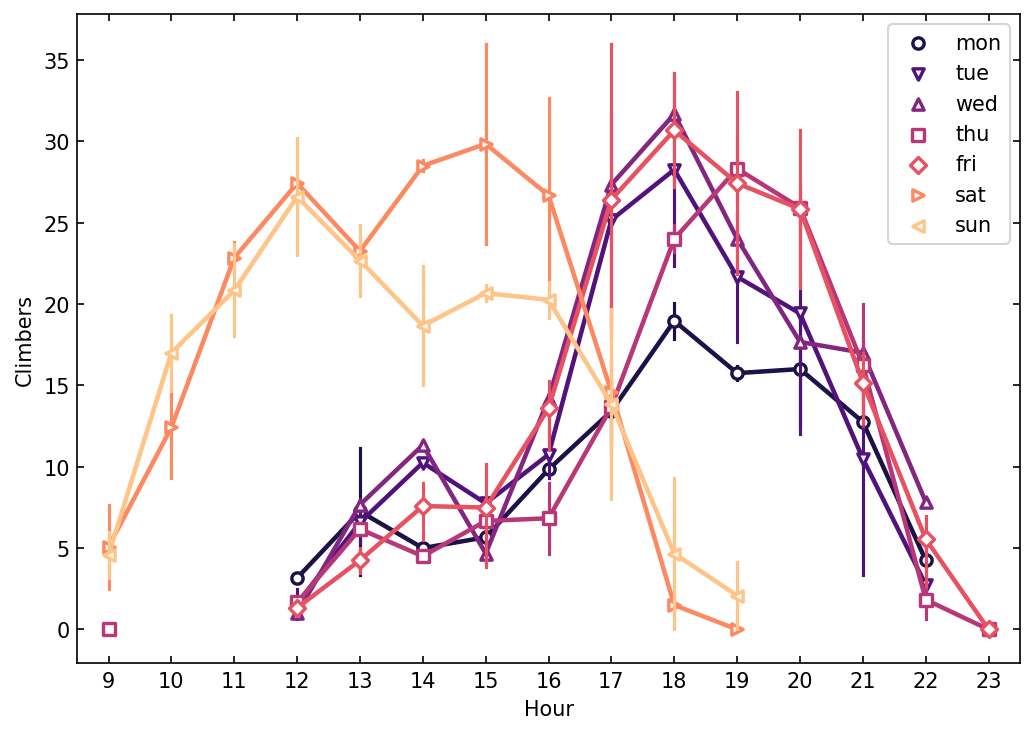

In [3]:
fig, ax = plt.subplots(figsize=(7,5),dpi=150)
days = ['mon','tue','wed','thu','fri','sat','sun']

# sns.boxplot(x='time', y='n',data=df_hourly,ax=ax,
#             hue='wd', palette='plasma', fliersize=0
#            )
# sns.stripplot(x='time', y='n',data=df_hourly,ax=ax,
#               hue='wd', palette='plasma', jitter=True, dodge=0.5, edgecolor='k'
#              )
sns.pointplot(x='time', y='n',data=df_hourly,ax=ax,
              hue='wd', style='wd', palette='magma',scale=.8,errwidth=1.5,mfc='w',
              markers=['o','v','^','s','D','>','<']
             )
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=days)
ax.set_xlim(left=2.5)
ax.set_xlabel('Hour')
ax.set_ylabel('Climbers')
ax.tick_params(which='both',direction='in',right=True,top=True)

fig.patch.set_facecolor('w')
ax.patch.set_facecolor('w')
fig.tight_layout()

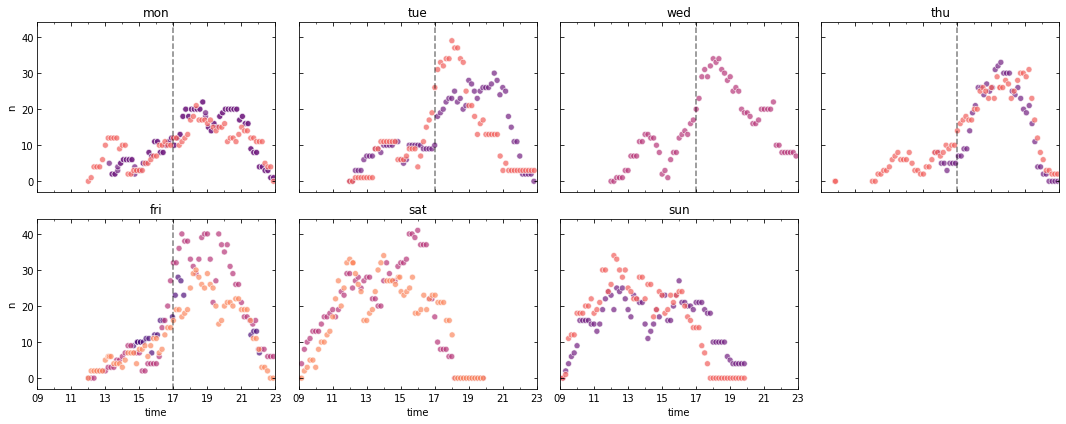

In [4]:
fig, ax = plt.subplots(2,4, figsize=(15,6),sharex=True,sharey=True)
days = ['mon','tue','wed','thu','fri','sat','sun']
ax = ax.flatten()

start = datetime.datetime.combine(datetime.date.today(),datetime.time(9,0))
end = datetime.datetime.combine(datetime.date.today(),datetime.time(23,0))
xmajor = pd.date_range(start,end,freq='2H').tolist()
xminor = pd.date_range(start+datetime.timedelta(hours=1),
                       end-datetime.timedelta(hours=1),
                       freq='2H').tolist()
for w, d in week:
#     ax[w].plot(d.time,d.n,'o',label=days[w],markerfacecolor='w')
    sns.scatterplot(x='time', y='n', data=d, ax=ax[w],
                    hue='date', 
#                     style='date',
                    palette='magma',
                    alpha=.7,
                    legend=False
                   )
    ax[w].set_title(days[w])              
    ax[w].set_xlim(start, end)
    ax[w].set_xticks(xmajor)
    ax[w].set_xticks(xminor,minor=True)
    ax[w].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    ax[w].tick_params(which='both',direction='in',right=True,top=True)
    if w < 5:
        ax[w].axvline(datetime.datetime.combine(datetime.date.today(),datetime.time(17,0)),ls='--',c='k',alpha=.5);
# ax[3].set_xticklabels(ax[1].get_xticklabels())
fig.patch.set_facecolor('w')
fig.tight_layout()

ax[-1].axis('off');


# draft making of the scraper

In [5]:
from bs4 import BeautifulSoup
import urllib.request
import json
from csv import writer
from datetime import datetime

In [6]:
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [7]:
source = urllib.request.urlopen('https://portal.rockgympro.com/portal/public/bc4d3be86f2f8564a4e5e4f9151f6bf6/occupancy?&iframeid=occupancyCounter&fId=1837').read()
soup = BeautifulSoup(source,'html.parser') 

In [8]:
rawJ = soup.find_all('script')[2]
J = str(rawJ)
J1 = J.split("'CNP' : ")
J2 = J1[1].split(';')
J3 = J2[0].replace("\n", "")
J4 = J3.rsplit(',',1)
J5 = J4[0].replace("'",'"')

In [9]:
s = json.loads(J5)
c = s["count"]

In [10]:
now = datetime.now()
ct = now.strftime("%D %H:%M:%S")
wkd = now.weekday()

In [11]:
append_list_as_row('data.csv', [ct,wkd,c])